In [ ]:
%pip install cufflinks
%pip install nbformat


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML 

In [ ]:
data = pd.read_csv("CountryTable.csv")
data

In [5]:
#Realizamos una copia del dataframe
data=data.copy()

In [7]:
valores_nulos=data.isnull().sum()
valores_nulos

code                  0
name                  0
continent             0
region                0
surface_area          0
independence_year    47
population            0
life_expectancy      17
gnp                   0
gnp_old              61
local_name            1
government_form       0
head_of_state         3
capital               7
code2                 1
dtype: int64

In [ ]:
data["independence_year"] =data["independence_year"].fillna("1900") 
data

In [ ]:
data["life_expectancy"]=data["life_expectancy"].fillna(round(data["life_expectancy"].mean(),1))
data

In [ ]:
data["gnp_old"]=data["gnp_old"].fillna(round(data["gnp_old"].mean(),1))
data

In [ ]:
data["local_name"] =data["local_name"].fillna("Inexistente") 
data

In [ ]:
data["head_of_state"] =data["head_of_state"].fillna("Desconocido") 
data

In [ ]:
data["capital"] =data["capital"].fillna("0") 
data

In [ ]:
data["code2"] =data["code2"].fillna("NA") 
data

In [17]:
valores_nulos=data.isnull().sum()
valores_nulos

code                 0
name                 0
continent            0
region               0
surface_area         0
independence_year    0
population           0
life_expectancy      0
gnp                  0
gnp_old              0
local_name           0
government_form      0
head_of_state        0
capital              0
code2                0
dtype: int64

In [ ]:
#Aplicar método de distribución normal para identificar Outliers, tomando como limites 2 desviaciones estándar,
#exclusivamente para las columnas “gnp old” y “population”, obtener los diagramas de caja de cada una respectivamente.


In [22]:
y=data["gnp_old"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 2029485.9971340206
Limite inferior permitido -1698417.3753766986


In [ ]:
#Encontramos Ouliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos limpios
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

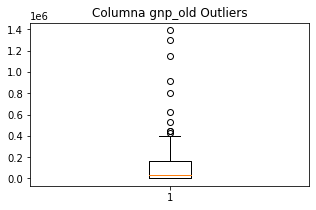

In [26]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["gnp_old"]) 
plt.title("Columna gnp_old Outliers")
plt.show() #dibujamos el diagrama

In [27]:
y=data["population"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 353453549.7887699
Limite inferior permitido -302585353.5544602


In [28]:
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
99,IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN


In [29]:
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,165534.3,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900,8000,76.1,63.2,165534.3,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,165534.3,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


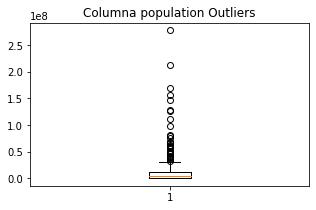

In [30]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["population"]) 
plt.title("Columna population Outliers")
plt.show() #dibujamos el diagrama

In [ ]:
#Aplicar método de rango intercuartílico para identificar Outliers, tomando como limites 1.3 iqr,
#  exclusivamente para las columnas “gnp old”, “surface área”, “life expectancy” y “population”, 
# obtener los diagramas de caja de cada una respectivamente.


In [31]:
#Método aplicando Cuartiles. Encuentro cuartiles.
y=data["gnp_old"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.3*iqr
Limite_Inferior_iqr= percentile25 - 1.3*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 376225.04
Limite inferior permitido -207226.24


In [ ]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

In [ ]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["gnp_old"]) 
plt.title("Columna gnp-old Outliers con cuartiles")
plt.show() #dibujamos el diagrama

In [35]:
y=data["surface_area"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.3*iqr
Limite_Inferior_iqr= percentile25 - 1.3*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 914177.8500000001
Limite inferior permitido -513148.35000000003


In [ ]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["surface_area"]) 
plt.title("Columna surface_area Outliers con cuartiles")
plt.show() #dibujamos el diagrama

In [39]:
y=data["life_expectancy"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.3*iqr
Limite_Inferior_iqr= percentile25 - 1.3*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 92.7
Limite inferior permitido 44.10000000000001


In [ ]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

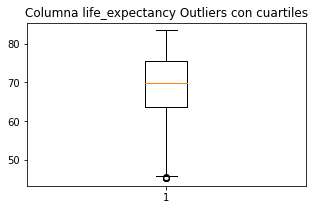

In [42]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["life_expectancy"]) 
plt.title("Columna life_expectancy Outliers con cuartiles")
plt.show() #dibujamos el diagrama

In [43]:
y=data["population"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.3*iqr
Limite_Inferior_iqr= percentile25 - 1.3*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 34042250.0
Limite inferior permitido -18868750.0


In [44]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rua,69.0,AR
21,BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
30,BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
44,COD,"Congo, The Democratic Republic of the",Africa,Central Africa,2344858.0,1960.0,51654000,48.8,6964.0,2474.0,Republique Democratique du Congo,Republic,Joseph Kabila,2298.0,CD
47,COL,Colombia,South America,South America,1138914.0,1810.0,42321000,70.3,102896.0,105116.0,Colombia,Republic,Andres Pastrana Arango,2257.0,CO
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
63,EGY,Egypt,Africa,Northern Africa,1001449.0,1922.0,68470000,63.3,82710.0,75617.0,Misr,Republic,Hosni Mubarak,608.0,EG
66,ESP,Spain,Europe,Southern Europe,505992.0,1492.0,39441700,78.8,553233.0,532031.0,Espana,Constitutional Monarchy,Juan Carlos I,653.0,ES
68,ETH,Ethiopia,Africa,Eastern Africa,1104300.0,-1000.0,62565000,45.2,6353.0,6180.0,YeItyop iya,Republic,Negasso Gidada,756.0,ET


In [45]:
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,165534.3,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900,8000,76.1,63.2,165534.3,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,WSM,Samoa,Oceania,Polynesia,2831.0,1962.0,180000,69.2,141.0,157.0,Samoa,Parlementary Monarchy,Malietoa Tanumafili II,3169.0,WS
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,165534.3,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


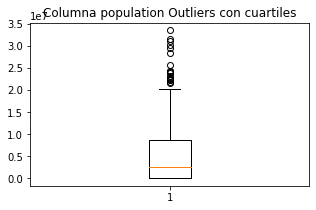

In [46]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["population"]) 
plt.title("Columna population Outliers con cuartiles")
plt.show() #dibujamos el diagrama

In [ ]:
#Aplicar método de distribución normal para identificar Outliers, tomando como limites 3 desviaciones estándar, 
# exclusivamente para la columna “gnp old” y sustituirlos por el promedio de la columna en caso de haberlos.


In [47]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data['gnp_old']
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 2029485.9971340206
Limite inferior permitido -1698417.3753766986


In [48]:
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2


In [ ]:
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

In [ ]:
#Aplica las siguientes transformaciones al DataFrame original y obtener en cada una las siguientes representaciones de datos:
#Grafico Lineal (Lineplot), Grafico de barras (Barplot), Grafico de cajas, (Boxplot) Histograma (Histplot) y Mapa de dispersión (Scatterplot).

In [ ]:
#Reestructurar el Dataframe
data = data.dropna()
Data= data.pivot(index='code', columns='continent',  values='population')
#Data=Data [['female']] #Aqui se pueden editar las columnas que se desean mostrar en values
Data

In [ ]:
#Lineplot o grafico lineal
Data.iplot(kind='line', xTitle='Codigo', yTitle='population', title='Population por continente')

In [ ]:
# Barplot o grafico de barras
Data = Data[Data.index.isin(["HuN", "NZL"])]

# plotting
Data.iplot(kind='bar', xTitle='Code',
                           yTitle='Population', title='Muestra de population por continente')

In [ ]:
# Boxplot o grafico de caja
Data.iplot(kind='box', xTitle='Continent',
                    yTitle='Population', title='Population per continent')

In [ ]:
#Histplot o Histograma
Data[['Oceania']].iplot(kind='hist',xTitle='Population', 
                               title='Distibución de la poblacion en Oceania')

In [ ]:
#Scatterplot o Mapa de dispersión
Data[['Oceania']].iplot(kind='scatter', mode='markers',xTitle='Population', 
                               title='Distibución de poblacion en Oceania')

In [69]:
data

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,165534.3,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900,8000,76.1,63.2,165534.3,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,165534.3,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [ ]:
#Reestructurar el Dataframe
data = data.dropna()
Data1= data.pivot(index='name', columns='region',  values='surface_area')
#Data=Data [['female']] #Aqui se pueden editar las columnas que se desean mostrar en values
Data1

In [ ]:
# Barplot o grafico de barras
Index2 = Data1[Data1.index.isin(["Zimbabwe", "Caribbean"])]

# plotting
Index2.iplot(kind='bar', xTitle='Name',
                           yTitle='surface_area', title='Muestra de las surface_Area de Zimbabwe y Caribbean')

In [ ]:
Data1.iplot(kind='box', xTitle='Region',
                    yTitle='surface_Area', title='Surface Area por region')

In [ ]:
#Histograma
Data1[['Caribbean']].iplot(kind='hist',xTitle='Surf Area', 
                               title='Distibución de la poblacion en Carribbean')


In [ ]:
#Scatterplot o Mapa de dispersión

Data1[['Caribbean']].iplot(kind='scatter', mode='markers',xTitle='name', 
                               title='Distibución de superficie de Caribbean')

In [85]:
data=data.copy()
data

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,165534.3,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900,8000,76.1,63.2,165534.3,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,165534.3,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [86]:
#Reestructurar el Dataframe
data = data.dropna()
Data2= data.pivot(index='local_name', columns='government_form',  values='independence_year')
#Data=Data [['female']] #Aqui se pueden editar las columnas que se desean mostrar en values
Data2

government_form,Administrated by the uN,Autonomous Area,Co-administrated,Commonwealth of the uS,Constitutional Monarchy,Constitutional Monarchy (Emirate),"Constitutional Monarchy, Federation",Dependent Territory of Norway,Dependent Territory of the uK,Dependent Territory of the uS,...,Parliamentary Coprincipality,Part of Denmark,People'sRepublic,Republic,Socialistic Republic,Socialistic State,Special Administrative Region of China,Territorial Collectivity of France,Territory of Australia,uS Territory
local_name,,,,,,,,,,,,,,,,,,,,,
uman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afganistan/Afqanestan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al- Arabiya as-Sa udiya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al- Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1932.0,NaN,NaN,NaN,NaN,NaN,NaN
Al-Bahrayn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
united Kingdom,NaN,NaN,NaN,NaN,1066.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
united States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
united States Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#Lineplot o grafico lineal
Data2.iplot(kind='line', xTitle='local_name', yTitle='independence_year', title='Años de la independencia de las regiones')
# Barplot o grafico de barras


In [ ]:
# Barplot o grafico de barras
Barplot = Data2[Data2.index.isin(["Mali", "Togo"])]

# plotting
Barplot.iplot(kind='bar', xTitle='local_name',
                           yTitle='independence_year', title='Año de la independencia de Mali y Tongo')

In [89]:
# Boxplot o grafico de caja

Data2.iplot(kind='box', xTitle='government_form',
                    yTitle='independence_year', title='Rango de años de las independecia por cada gobierno de los diferentes paises')

In [94]:
#Histograma

Data2[['Socialistic State']].iplot(kind='hist',xTitle='independence_year', 
                               title='Histograma de la independencia de los territorios de los estatos socialistas')

In [95]:
#Scatterplot o Mapa de dispersión

Data2[['Socialistic State']].iplot(kind='scatter', mode='markers',xTitle='local_name', 
                               title='Distibución de años de independencia de los estados socialistas.')